波士顿房价数据集（Boston housing prices dataset）

In [37]:
#加载数据集
from sklearn import  datasets
import sklearn
from sklearn import  metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import cv2
%matplotlib inline

bosten  = datasets.load_boston()

在'DESCR'中我们可以获取关于数据集的更多信息，在'data'中找到所有的数据，在'feature_names'中找到所有的特征名称，在'filename'中找到波士顿CSV数据集的物理位置，并在'target'中找到所有的目标值：

In [38]:
dir(bosten)
# ['DESCR', 'data', 'feature_names', 'filename', 'target']
bosten.data.shape#  (506, 13)
bosten.target.shape# (506,) 房价数据

(506,)

训练模型linreg 为线性回归模型的一个对象

主要思想：sklearn.linear_model.LinearRegression求解线性回归方程参数时，首先判断训练集X是否是稀疏矩阵，如果是，就用Golub&Kanlan双对角线化过程方法来求解；否则调用C库中LAPACK中的用基于分治法的奇异值分解来求解。在sklearn中并不是使用梯度下降法求解线性回归，而是使用最小二乘法求解。
sklearn.LinearRegression的fit()方法：

In [39]:
'''  sklearn.LinearRegression.fit(X,Y)
  if sp.issparse(X):#如果X是稀疏矩阵
      if y.ndim < 2:
          out = sparse_lsqr(X, y)
          self.coef_ = out[0]
          self._residues = out[3]
      else:
          # sparse_lstsq cannot handle y with shape (M, K)
          outs = Parallel(n_jobs=n_jobs_)(
              delayed(sparse_lsqr)(X, y[:, j].ravel())
              for j in range(y.shape[1]))
          self.coef_ = np.vstack(out[0] for out in outs)
          self._residues = np.vstack(out[3] for out in outs)
  else:
      self.coef_, self._residues, self.rank_, self.singular_ = \
          linalg.lstsq(X, y)
      self.coef_ = self.coef_.T
'''

'  sklearn.LinearRegression.fit(X,Y)\n  if sp.issparse(X):#如果X是稀疏矩阵\n      if y.ndim < 2:\n          out = sparse_lsqr(X, y)\n          self.coef_ = out[0]\n          self._residues = out[3]\n      else:\n          # sparse_lstsq cannot handle y with shape (M, K)\n          outs = Parallel(n_jobs=n_jobs_)(\n              delayed(sparse_lsqr)(X, y[:, j].ravel())\n              for j in range(y.shape[1]))\n          self.coef_ = np.vstack(out[0] for out in outs)\n          self._residues = np.vstack(out[3] for out in outs)\n  else:\n      self.coef_, self._residues, self.rank_, self.singular_ =           linalg.lstsq(X, y)\n      self.coef_ = self.coef_.T\n'

lasso 回归：https://blog.csdn.net/foneone/article/details/96576990

在真实问题中，一个预测问题可能有上百种特征，并不知道哪一些是高阶多项式的项，就像不知道\theta_{3}和\theta_{4}是高阶的项。所以，如果假设有一百个特征，并不知道如何选择关联度更好的参数，如何缩小参数的数目等等。 因此在正则化里，要做的事情，就是把减小损失函数中所有的参数值


此外：还有L2正则化：\lambda \sum_{j=1}^{n} w_{j}^{2}，加了这种正则化的损失函数模型为：脊(岭)回归（Ridge Regression).

asso的复杂程度由λ来控制，λ越大对变量较多的线性模型的惩罚力度就越大，从而最终获得一个变量较少的模型

In [40]:
lassoreg = linear_model.Lasso()  #均方误差+ a sum（L1）
ridgereg = linear_model.Ridge() #L2 MSE +a sum（L2）

In [41]:
linreg = linear_model.LinearRegression()

数据分开为x_train,x_test,y_train,y_test
其中输入为 bosten.data  需要预测的输出为bosten.target

In [42]:
x_train,x_test,y_train,y_test = sklearn.model_selection.train_test_split(bosten.data,bosten.target,test_size=0.1,random_state=42)
# random_state 类似于seed（42）
#test_size 分割数据集为 9：1的比例默认为0.25

在scikit-learn中，train函数命名为fit，但是在其他方面，它的行为与在OpenCV中是完全一样的：

In [47]:
linreg.fit(x_train,y_train)
lassoreg.fit(x_train,y_train)
ridgereg.fit(x_train,y_train)
# y_pre = linreg.predict(x_train)
# y_pre_lassor = lassoreg.predict(x_train)
# y_pre_ridger = ridgereg.predict(x_train)

# metrics.mean_squared_error(y_train,y_pre)

Ridge()

这里的score：
The coefficient R2 is defined as (1-(u)/(v)), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum().

The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R2 score of 0.0.
评价系统，模型评分

这里添加一个决策树的回归模型来作为线性回归的对比
一个小的不同点,
决策树用来作为分类时候
    数据的拆分标准往往依据：
        1.Gini基数
            Gini是一个用于度量节点纯度的指标。一个节点越“纯”，也就是说这个节点的样本越多属于同类，那么Gini指标越小，所以Gini指标也称为Gini不纯度
        2.或是entropy 熵增益

决策树用来作为回归模型时候
    数据的拆分标准为：
        1.MAE(这个标准计算实际值和预测值之间的平均绝对误差,并拆分产生最小平均绝对误差的节点)L1
        2.MSE(这个标准计算实际值和预测值之间的均方误差,并拆分产生最小均方误差的节点)L2


In [ ]:
'''添加一个用决策树来进行回归'''

from sklearn import  tree
dtree = tree.DecisionTreeRegressor()


In [48]:
#  模型评分
linreg.score(x_train,y_train),lassoreg.score(x_train,y_train),ridgereg.score(x_train,y_train)


(0.7375152736886281, 0.6813080948165031, 0.7353661779527543)

legend 是显示图例
用法如下
https://blog.csdn.net/qq_33221533/article/details/81431264
loc默认指向best

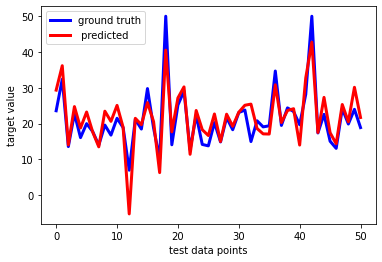

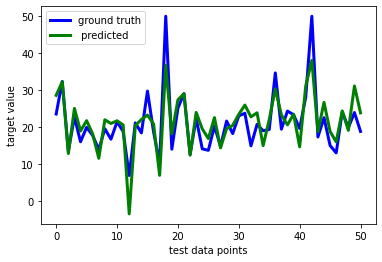

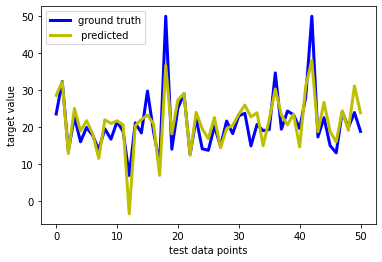

In [51]:
#测试集的模型表现
y_test_pre = linreg.predict(x_test)
plt.plot(y_test,linewidth = 3,c = 'b',label = 'ground truth')
plt.plot(y_test_pre,linewidth=3,c ='r',label=' predicted')

plt.legend(loc = 'best')
plt.xlabel('test data points')
plt.ylabel('target value')
plt.show()

y_test_pre_lassor = lassoreg.predict(x_test)
plt.plot(y_test,linewidth = 3,c = 'b',label = 'ground truth')
plt.plot(y_test_pre_lassor,linewidth=3,c ='g',label=' predicted')

plt.legend(loc = 'best')
plt.xlabel('test data points')
plt.ylabel('target value')
plt.show()

y_test_pre_ridge = ridgereg.predict(x_test)
plt.plot(y_test,linewidth = 3,c = 'b',label = 'ground truth')
plt.plot(y_test_pre_lassor,linewidth=3,c ='y',label=' predicted')

plt.legend(loc = 'best')
plt.xlabel('test data points')
plt.ylabel('target value')
plt.show()

我们通过计算R平方来形式化数据的方差：
我们还绘制了一条对角线作为参考（用黑色虚线'k--'），这我们很快就能看到。可是我们还希望在文本框中显示R2得分和均方误差：

plt.legend 设置图框
plt.text 设置文字说明


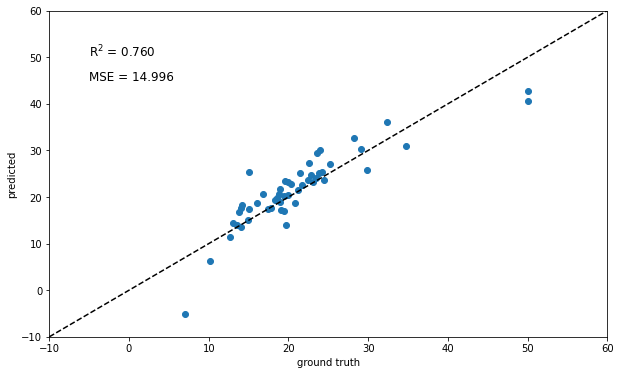

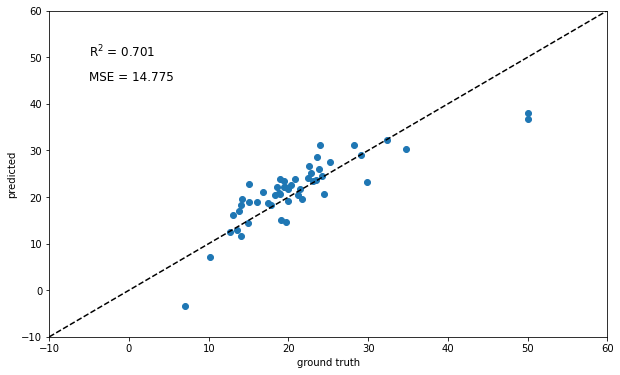

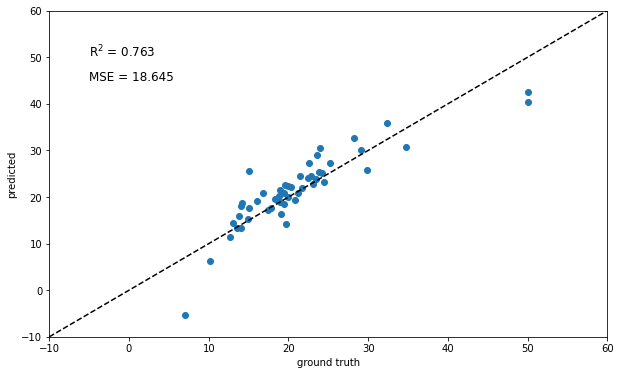

In [113]:
y = [y_test_pre,y_test_pre_lassor,y_test_pre_ridge]

scorestr1 = r'R$^2$ = %.3f' % linreg.score(x_test, y_test)
scorestr2 = r'R$^2$ = %.3f' % lassoreg.score(x_test, y_test)
scorestr3 = r'R$^2$ = %.3f' % ridgereg.score(x_test, y_test)
errstr1 = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_test_pre)
errstr2 = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_test_pre_ridge)
errstr3 = 'MSE = %.3f' % metrics.mean_squared_error(y_test, y_test_pre_lassor)
score = [scorestr1,scorestr2,scorestr3]  #字符串
errstr = [errstr1,errstr2,errstr3]     #字符串

for index,data in enumerate(y):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test,data , 'o')
    plt.plot([-10, 60], [-10, 60], 'k--')
    plt.text(-5, 50, score[index], fontsize=12)
    plt.text(-5, 45, errstr[index], fontsize=12)
    plt.axis([-10, 60, -10, 60])
    plt.xlabel('ground truth')
    plt.ylabel('predicted')
    plt.show()


如果我们的模型是完美的，那么所有的数据点都应该位于虚线对角线上，因为y_pred总是等于y_true。对角线上的偏差表明模型存在一定的误差，或者数据中存在一些模型无法解释的偏差。实际上，R2表明我们能够解释71%的数据分散，均方误差是21.517。这些是我们可以用来比较线性回归模型和一些更复杂的模型的性能指标。
